In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ad = xr.open_dataset("./data/ad.nc")['ad']
ad_d = xr.open_dataset("./data/ad_d.nc")['ad_d']
ad.shape

(32, 13, 81)

In [4]:
from eofs.standard import Eof
solver = Eof(np.array(ad))

In [6]:
vars = solver.varianceFraction()
vars[:5]

array([0.45699027, 0.2170375 , 0.11724017, 0.0409204 , 0.03077814],
      dtype=float32)

In [7]:
pcs = solver.pcs(pcscaling=1,npcs=3)
pcs.shape

(32, 3)

In [8]:
patterns = -solver.eofsAsCovariance(neofs=10,pcscaling=1)
patterns.shape

(10, 13, 81)

In [9]:
time_label = ["Oct-1","Jan0","Apr0","Jul0","Oct0"]

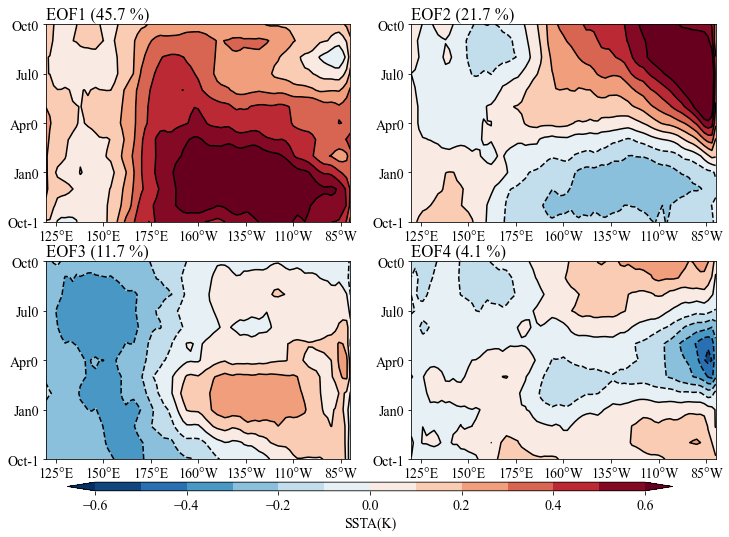

In [10]:
from cartopy.mpl.ticker import LongitudeFormatter
plt.rc('font', family='Times New Roman', size=14)
fig = plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2,2,i+1)
    cm = plt.contourf(np.array(ad.lon),np.arange(13),patterns[i],cmap="RdBu_r",levels=np.linspace(-0.6,0.6,13),extend="both")
    plt.contour(cm,colors="k")
    plt.yticks(np.arange(0,14,3),time_label)
    plt.gca().xaxis.set_major_formatter(LongitudeFormatter())
    plt.title("EOF%s (%.1f %%)"%(i+1,vars[i]*100),loc="left")
ax_cb = fig.add_axes([0.15, 0.07, 0.70, 0.015])
cb = fig.colorbar(cm,
                  cax=ax_cb,
                  orientation="horizontal",
                  spacing="proportional")
cb.set_label("SSTA(K)")
plt.savefig("./pic/eof.png")
# plt.subplot(2,2,4)
# plt.plot(pcs)
    # plt.colorbar()

In [13]:
sum(vars[:3])

0.7912679389119148

In [14]:
pcs.shape

(32, 3)

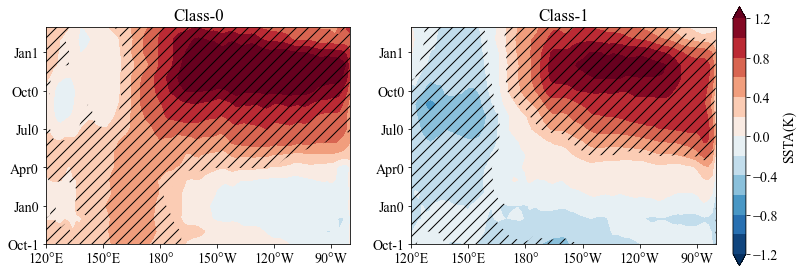

In [16]:
time_label = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0"]
time_label1 = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0", "Jan1"]
from sklearn.cluster import KMeans
import scipy.stats as sts

xp, yp = np.array(ad.lon), np.arange(18)
clus = 2
km_m = KMeans(n_clusters=clus, random_state=0).fit(pcs)
labels = km_m.labels_
ad_d1 = np.array(ad_d)
fig = plt.figure(figsize=(12, 4))
for clu in range(clus):

    add_clu = ad_d1[labels == clu]
    add_clu_mean = add_clu.mean(axis=0)
    p_v = sts.ttest_1samp(add_clu, np.zeros_like(add_clu_mean), axis=0).pvalue
    # 画图
    plt.subplot(1, 2, clu + 1)
    cm = plt.contourf(xp,
                 yp,
                 add_clu_mean,
                 cmap="RdBu_r",
                 levels=np.linspace(-1.2, 1.2, 13),
                 extend="both")
    plt.contourf(xp,
                 yp,
                 p_v,
                 hatches=['//', None],
                 colors="none",
                 levels=[0, 0.05, 1])
    plt.yticks(np.arange(0, 17, 3), time_label1)
    plt.xticks(xp[::15])
    plt.gca().xaxis.set_major_formatter(LongitudeFormatter())
    plt.title("Class-%s" % clu)
ax_cb = fig.add_axes([0.92, 0.05, 0.015, 0.90])
cb = fig.colorbar(cm,
                  cax=ax_cb,
                  orientation="vertical",
                  spacing="proportional")
cb.set_label("SSTA(K)")
# plt.tight_layout()
plt.savefig("./pic/k-means_re%s.png" % clus)
plt.show()


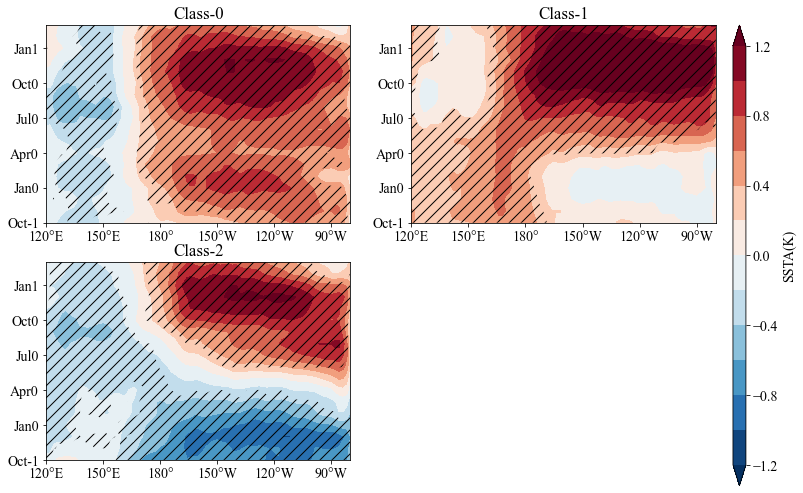

In [18]:
time_label = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0"]
time_label1 = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0", "Jan1"]
from sklearn.cluster import KMeans
import scipy.stats as sts

xp, yp = np.array(ad.lon), np.arange(18)
clus = 3
km_m = KMeans(n_clusters=clus, random_state=0).fit(pcs)
labels = km_m.labels_
ad_d1 = np.array(ad_d)
fig = plt.figure(figsize=(12, 8))
for clu in range(clus):

    add_clu = ad_d1[labels == clu]
    add_clu_mean = add_clu.mean(axis=0)
    p_v = sts.ttest_1samp(add_clu, np.zeros_like(add_clu_mean), axis=0).pvalue
    # 画图
    plt.subplot(2, 2, clu + 1)
    cm = plt.contourf(xp,
                 yp,
                 add_clu_mean,
                 cmap="RdBu_r",
                 levels=np.linspace(-1.2, 1.2, 13),
                 extend="both")
    plt.contourf(xp,
                 yp,
                 p_v,
                 hatches=['//', None],
                 colors="none",
                 levels=[0, 0.05, 1])
    plt.yticks(np.arange(0, 17, 3), time_label1)
    plt.xticks(xp[::15])
    plt.gca().xaxis.set_major_formatter(LongitudeFormatter())
    plt.title("Class-%s" % clu)
ax_cb = fig.add_axes([0.92, 0.08, 0.015, 0.80])
cb = fig.colorbar(cm,
                  cax=ax_cb,
                  orientation="vertical",
                  spacing="proportional")
cb.set_label("SSTA(K)")
# plt.tight_layout()
plt.savefig("./pic/k-means_re%s.png" % clus)
plt.show()

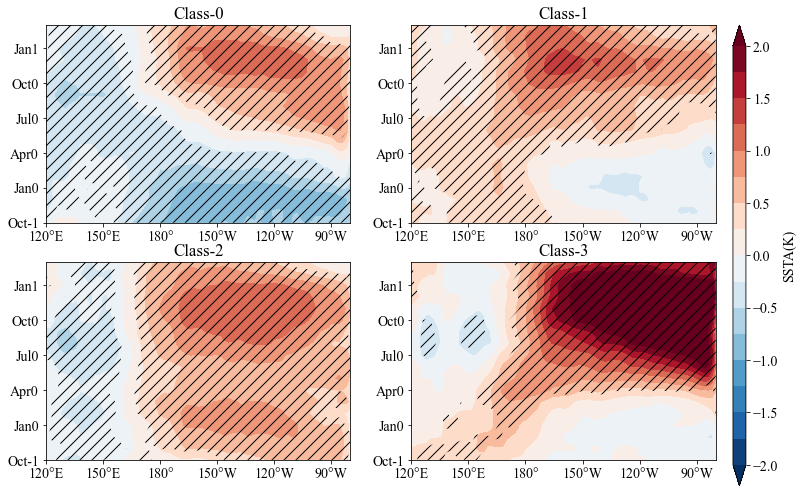

In [22]:
time_label = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0"]
time_label1 = ["Oct-1", "Jan0", "Apr0", "Jul0", "Oct0", "Jan1"]
from sklearn.cluster import KMeans
import scipy.stats as sts
from cartopy.mpl.ticker import LongitudeFormatter

plt.rc('font', family='Times New Roman', size=14)
xp, yp = np.array(ad.lon), np.arange(18)
clus = 4
km_m = KMeans(n_clusters=clus, random_state=0).fit(pcs)
labels = km_m.labels_
ad_d1 = np.array(ad_d)
fig = plt.figure(figsize=(12, 8))
for clu in range(clus):

    add_clu = ad_d1[labels == clu]
    add_clu_mean = add_clu.mean(axis=0)
    p_v = sts.ttest_1samp(add_clu, np.zeros_like(add_clu_mean), axis=0).pvalue
    # 画图
    plt.subplot(2, 2, clu + 1)
    cm = plt.contourf(xp,
                      yp,
                      add_clu_mean,
                      cmap="RdBu_r",
                      levels=np.linspace(-2, 2, 17),
                      extend="both")
    plt.contourf(xp,
                 yp,
                 p_v,
                 hatches=['//', None],
                 colors="none",
                 levels=[0, 0.1, 1])
    plt.yticks(np.arange(0, 17, 3), time_label1)
    plt.xticks(xp[::15])
    plt.gca().xaxis.set_major_formatter(LongitudeFormatter())
    plt.title("Class-%s" % clu)
ax_cb = fig.add_axes([0.92, 0.08, 0.015, 0.80])
cb = fig.colorbar(cm,
                  cax=ax_cb,
                  orientation="vertical",
                  spacing="proportional")
cb.set_label("SSTA(K)")
# plt.tight_layout()
# plt.savefig("./pic/k-means_re%s.png" % clus)
plt.show()

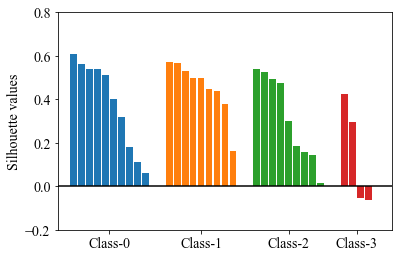

In [26]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = silhouette_samples(pcs, labels=labels)
ini_len = 0
fig = plt.figure(figsize=[6, 4])
ticks = []
for clu in range(clus):

    score_clas = scores[labels == clu]
    xbar = np.arange(score_clas.shape[0]) + ini_len
    ini_len = xbar.max() + 3
    plt.bar(xbar, np.sort(score_clas)[::-1],width=0.85)
    tick = (xbar.min()+xbar.max())/2
    ticks.append(tick)
plt.ylim(-0.2, 1)
plt.xticks(ticks,["Class-%s"%i for i in range(clus)])
plt.axhline(y=0,color="black")
plt.xlim(-2,40)
plt.ylim(-0.2,0.8)
plt.ylabel("Silhouette values")
plt.savefig("pic/Silhouette_values.png")
plt.show()